# Práctica 1 B
**Grupo 16**
- Erik Karlgren Domercq
- David Bugoi
- Daniela Alejandra Córdova Porta

Cargamos la librería de aima y la clase `Problem` que usaremos para los siguientes problemas.

In [4]:
cd aima-python

C:\Users\Daniela\Documents\UCM IA\github\aima-python


In [5]:
class Problem(object):

    """The abstract class for a formal problem. You should subclass
    this and implement the methods actions and result, and possibly
    __init__, goal_test, and path_cost. Then you will create instances
    of your subclass and solve them with the various search functions."""

    def __init__(self, initial, goal=None):
        """The constructor specifies the initial state, and possibly a goal
        state, if there is a unique goal. Your subclass's constructor can add
        other arguments."""
        self.initial = initial
        self.goal = goal

    def actions(self, state):
        """Return the actions that can be executed in the given
        state. The result would typically be a list, but if there are
        many actions, consider yielding them one at a time in an
        iterator, rather than building them all at once."""
        raise NotImplementedError

    def result(self, state, action):
        """Return the state that results from executing the given
        action in the given state. The action must be one of
        self.actions(state)."""
        raise NotImplementedError

    def goal_test(self, state):
        """Return True if the state is a goal. The default method compares the
        state to self.goal or checks for state in self.goal if it is a
        list, as specified in the constructor. Override this method if
        checking against a single self.goal is not enough."""
        if isinstance(self.goal, list):
            return is_in(state, self.goal)
        else:
            return state == self.goal

    def path_cost(self, c, state1, action, state2):
        """Return the cost of a solution path that arrives at state2 from
        state1 via action, assuming cost c to get up to state1. If the problem
        is such that the path doesn't matter, this function will only look at
        state2.  If the path does matter, it will consider c and maybe state1
        and action. The default method costs 1 for every step in the path."""
        return c + 1

    def value(self, state):
        """For optimization problems, each state has a value.  Hill-climbing
        and related algorithms try to maximize this value."""
        raise NotImplementedError

    def coste_de_aplicar_accion(self, estado, accion):
        """Hemos incluido está función que devuelve el coste de un único operador (aplicar accion a estado). Por defecto, este
        coste es 1. Reimplementar si el problema define otro coste """ 
        return 1

# Ejercicio 1
Un grupo de 5 personas quiere cruzar un viejo y estrecho puente. Es una noche cerrada y se necesita llevar una linterna para cruzar. El grupo solo dispone de una linterna, a la que le quedan 5 minutos de batería.
1. Cada persona tarda en cruzar 10, 30, 60, 80 y 120 segundos, respectivamente.
2. El puente solo resiste un máximo de 2 personas cruzando a la vez, y cuando cruzan dos personas juntas, caminan a la velocidad del más lento.
3. No se puede lanzar la linterna de un extremo a otro del puente, así que cada vez que crucen dos personas, alguien tiene que volver a cruzar hacia atrás con la linterna a buscar a los compañeros que falten, y así hasta que hayan cruzado todos.

Definimos la clase del problema. Si se desea se pueden cambiar algunos de los parámetros como el número de personas, los tiempos de cada una y la duración de la batería de la linterna o su "tiempo límite".

In [3]:
from copy import deepcopy

class CruzarPuente(Problem):
    times = tuple()
    num_personas = 0

    def __init__(self, num_personas=5, time_limit=300, times=(10, 30, 60, 80, 120)):
        self.initial = ('left', tuple([x for x in range(1, num_personas + 1)]), 0)
        self.goal = ('right', (), time_limit)
        self.times = times
        self.num_personas = num_personas

    def cost(self, action):
        return max(self.times[action[0] - 1], self.times[action[1] - 1])

    def actions(self, state):
        accs = list()
        if state[0] == 'left':
            for x in state[1]:
                for y in state[1]:
                    if x <= y and state[2] + self.cost((x, y)) <= self.goal[2]:
                        accs.append((x, y))
        else:
            for x in range(1, self.num_personas + 1):
                if x not in state[1] and state[2] + self.cost((x, x)) <= self.goal[2]:
                    accs.append((x, x))
        return accs

    def result(self, state, action):
        new_state = deepcopy(state)
        linterna = new_state[0]
        l = list(new_state[1])
        tiempo = new_state[2]
        if new_state[0] == 'left':
            linterna = 'right'
            if action[0] == action[1]:
                l.remove(action[0])
            else:
                l.remove(action[0])
                l.remove(action[1])
        else:
            linterna = 'left'
            l.append(action[0])
        tiempo += self.cost(action)
        return (linterna, tuple(l), tiempo)

    def path_cost(self, c, state1, action, state2):
        return c + self.cost(action)

    def goal_test(self, state):
        if isinstance(self.goal, tuple):
            linterna_is_equal = state[0] == self.goal[0]
            personas_is_equal = state[1] == self.goal[1]
            time_limit_is_legal = state[2] <= self.goal[2]
            return linterna_is_equal and personas_is_equal and time_limit_is_legal
        else:
            return False

    def finalTime(self, state):
        return state[2]         

In [19]:
class Problema_con_Analizados(Problem):
         
    def __init__(self, problem):
        self.initial = problem.initial
        self.problem = problem
        self.analizados  = 0
        self.goal = problem.goal

    def actions(self, estado):
        return self.problem.actions(estado)

    def result(self, estado, accion):
        return self.problem.result(estado, accion)

    def goal_test(self, state):
        self.analizados += 1
        if isinstance(self.goal, tuple):
            linterna_is_equal = state[0] == self.goal[0]
            personas_is_equal = state[1] == self.goal[1]
            time_limit_is_legal = state[2] <= self.goal[2]
            return linterna_is_equal and personas_is_equal and time_limit_is_legal
        else:
            return False


    def coste_de_aplicar_accion(self, estado, accion):
        return c + self.cost(action)
    
    def check_solvability(self, state):
        """ Checks if the given state is solvable """

        inversion = 0
        for i in range(len(state)):
            for j in range(i+1, len(state)):
                if (state[i] > state[j]) and state[i] != 0 and state[j]!= 0:
                    inversion += 1
        
        return inversion % 2 == 0        

In [18]:
def resuelve_CruzarPuente(estado_inicial, algoritmo, h=None):
    pF=Problema_con_Analizados(CruzarPuente())
    if h: 
        sol= algoritmo(pF,h)
    else: 
        sol= algoritmo(pF)
    print("Solución: {0}".format(sol.solution()))
    print("Algoritmo: {0}".format(algoritmo.__name__))
    if h: 
        print("Heurística: {0}".format(h.__name__))
    else:
        pass
    print("Longitud de la solución: {0}. Nodos analizados: {1}. Tiempo: {2} ".format(len(sol.solution()),pF.analizados, sol.state[2]))


Comprobamos que el estado inicial y las acciones disponibles son las esperadas.

In [6]:
# Cargamos el módulo con los algoritmos de búsqueda.
from search import *

In [7]:
p = CruzarPuente()
p.initial

('left', (1, 2, 3, 4, 5), 0)

In [8]:
p.actions(p.initial)

[(1, 1),
 (1, 2),
 (1, 3),
 (1, 4),
 (1, 5),
 (2, 2),
 (2, 3),
 (2, 4),
 (2, 5),
 (3, 3),
 (3, 4),
 (3, 5),
 (4, 4),
 (4, 5),
 (5, 5)]

Probemos varios algoritmos de búsqueda no informados. Nótese que el campo _Tiempo_ al usar `resuelve_CruzarPuente` no se refiere al tiempo de ejecución del algoritmo sino al tiempo usado de la linterna en el problema.

Como vemos en los resultados de las siguientes dos celdas, la búsqueda con control de repetidos permite analizar muchos menos nodos, y por eso `depth_first_graph_search` tarda menos tiempo y consume menos memoria. También influye que la búsqueda en profundidad ya consume menos memoria de por sí que la búsqueda en anchura.

In [9]:
# La búsqueda en anchura asegura encontrar la solución si esta existe
breadth_first_tree_search(CruzarPuente()).solution()

[(1, 2), (1, 1), (4, 5), (2, 2), (1, 3), (1, 1), (1, 2)]

In [10]:
%%timeit
breadth_first_tree_search(CruzarPuente()).solution()

159 ms ± 6.32 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [11]:
%%timeit
depth_first_graph_search(CruzarPuente()).solution()

62.3 ms ± 2.92 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [12]:
resuelve_CruzarPuente(p.initial, breadth_first_tree_search )

Solución: [(1, 2), (1, 1), (4, 5), (2, 2), (1, 3), (1, 1), (1, 2)]
Algoritmo: breadth_first_tree_search
Longitud de la solución: 7. Nodos analizados: 6144. Tiempo: 290 


In [13]:
resuelve_CruzarPuente(p.initial, depth_first_graph_search )

Solución: [(1, 3), (1, 1), (1, 2), (2, 2), (4, 5), (1, 1), (1, 2)]
Algoritmo: depth_first_graph_search
Longitud de la solución: 7. Nodos analizados: 1733. Tiempo: 290 


Si cambiáramos los parámetros del problema, y sobre todo si incrementáramos el número de personas o el tiempo límite de la linterna, las búsquedas no informadas dejarían de ser capaces de resolver el problema en un tiempo razonable. Por ello vamos a introducir un par de heurísticas que nos deberían ayudar a encontrar la solución de forma más eficiente.

In [14]:
# Heuristicas 
import math

def h1(times=(10, 30, 60, 80, 120)):
    def heur1(node):
        state = node.state
        sum = 0

        if(len(state[1])>0):
            m = state[1][0]
        cont = 0
        for i in state[1]:
            if(i != num_personas):
                sum += max(times[num_personas-1],times[i-1])
                cont += 1
        for i in range(0,cont):
            sum += times[num_personas-1]
        return sum
    num_personas = len(times)
    return heur1


def h2(times=(10, 30, 60, 80, 120)):
    def heur2(node):
        state = node.state
        min = 0
        for x in state[1]:
            min = min + times[x-1]
        return min
    
    return heur2

# Cuando queramos usar una de las heurísticas usando los datos por defecto del problema CruzarPuente podemos
# usar 'h1' o 'h1()' en el caso de la primera heurística. Si queremos usar otros datos podemos usar, por ejemplo,
# 'h1(times=...)'.
hh1 = h1()
hh2 = h2()

In [15]:
pf = CruzarPuente()

In [16]:
sol1 = astar_search(pf, h1()).solution()
sol2 = astar_search(pf, h2()).solution()
print("Solución usando h1:", sol1)
print("Solución usando h2:", sol2)

Solución usando h1: [(1, 2), (1, 1), (1, 3), (1, 1), (4, 5), (2, 2), (1, 2)]
Solución usando h2: [(1, 2), (1, 1), (4, 5), (2, 2), (1, 3), (1, 1), (1, 2)]


Como vemos en los siguientes resultados, `h2` es una heurística que nos permite llegar a la solución significativamente más rápido que con `h1`. Esto se debe a que `h2` es bastante más sencillo de calcular en comparación con `h1`, pero como filtra muchos menos nodos esperamos que en problemas más complejos `h1` se comporte mejor.

In [17]:
%%timeit
astar_search(pf, h1()).solution()

27.7 ms ± 504 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [18]:
%%timeit
astar_search(pf, h2()).solution()

4.34 ms ± 121 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [22]:
resuelve_CruzarPuente(p.initial, astar_search,h1())

Solución: [(1, 3), (1, 1), (1, 2), (1, 1), (4, 5), (2, 2), (1, 2)]
Algoritmo: astar_search
Heurística: heur1
Longitud de la solución: 7. Nodos analizados: 445. Tiempo: 290 


In [23]:
resuelve_CruzarPuente(p.initial, astar_search,h2())

Solución: [(1, 3), (1, 1), (1, 2), (1, 1), (4, 5), (2, 2), (1, 2)]
Algoritmo: astar_search
Heurística: heur2
Longitud de la solución: 7. Nodos analizados: 892. Tiempo: 290 


Probemos con algunas variantes del problema. Usaremos `astar_search` con ambas heurísticas `h1` y `h2`. Como vemos a partir del problema con 7 personas, `h1` se comporta mejor porque, como ya habíamos comentado, filtra más nodos.

In [24]:
# Problema con 6 personas
n1 = 6
t1 = (10,20,30,50,10,100)
limit1 = 200

p1 = CruzarPuente(num_personas=n1, times=t1, time_limit=limit1)
print("Initial:",p1.initial)
print("Times:", p1.times)
print("Time limit:", limit1)

Initial: ('left', (1, 2, 3, 4, 5, 6), 0)
Times: (10, 20, 30, 50, 10, 100)
Time limit: 200


In [25]:
%%timeit
astar_search(p1,h2(t1)).solution()

17 ms ± 560 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [31]:
%%timeit
astar_search(p1,h1(t1)).solution()

66 ms ± 3.98 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [33]:
# Problema con 7 personas. Ya vemos que 'h2' deja de ser mejor heurística para este tamaño del problema.
n2 = 7
t2 = (10,20,25,30,40,45,70)
limit2 = 400

p2 = CruzarPuente(num_personas=n2, times=t2, time_limit=limit2)
print("Initial:",p2.initial)
print("Times:", p2.times)
print("Time limit:", limit2)

Initial: ('left', (1, 2, 3, 4, 5, 6, 7), 0)
Times: (10, 20, 25, 30, 40, 45, 70)
Time limit: 400


In [59]:
%%timeit
astar_search(p2,h2(t2)).solution()

6.83 s ± 217 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [37]:
%%timeit
astar_search(p2,h1(t2)).solution()

12.7 ms ± 226 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [60]:
# Problema con 15 personas. Solo probamos a buscar la solución usando la heurística 'h1'.
n3 = 15
t3 = tuple([10*x for x in range(1, n3+1)])
limit3 = 1180

p3 = CruzarPuente(num_personas=n3, times=t3, time_limit=limit3)
print("Initial:",p3.initial)
print("Times:", p3.times)
print("Time limit:", limit3)

Initial: ('left', (1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15), 0)
Times: (10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150)
Time limit: 1180


In [62]:
%%timeit
astar_search(p3,h1(t3)).solution()

6.67 s ± 206 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


# Ejercicio 2
En el siguiente puzle infantil se pide rellenar los espacios en blanco con números del 1 al 9 de tal modo que la ecuación sea correcta siguiendo el orden de las operaciones. Los números no pueden repetirse. Es decir, en cada
uno de los 9 huecos en blancos deberá ir un número sin repetirse. Según declaraciones del profesor Tran Phuong existen 362.880 combinaciones posibles para colocar los 9 dígitos en los 9 espacios en blanco, pero sólo unas
pocas son correctas. En la parte derecha se muestra una posible solución.

In [25]:
class puzleInfantil(Problem):
    def __init__(self, numeros =9, suma=66):
        """ Define goal state and initialize a problem """
        self.sumaT = 66
        self.operaciones = (" + 13 +", "*", "/", "+ 12 +", "*", "-", "- 11 +", "*", "/", "- 10")
        self.initial = (tuple([False for x in range(1, numeros + 1)]), 0, 0)
        self.goal = (tuple([True for x in range(1, numeros + 1)]), suma, 9)

    def actions(self, estado):
        numeros = estado[0]
        res = estado[1]
        operacion = estado[2]
        accs = list()
        cont = 1
        for x in numeros:
            if x == False:
                if operacion == 8:
                    if eval(str(res) + " " + self.operaciones[operacion] + " " + str(cont) + self.operaciones[9]) == self.sumaT:
                        accs.append(cont)
                else:
                    accs.append(cont)
            cont += 1
        return accs

    def result(self, estado, accion):
        res = estado[1]
        operacion = estado[2]
        numeros = list(estado[0])
        numeros[accion - 1] = True
        if operacion != 8:
            res = eval(str(res) + " " + self.operaciones[operacion] + " " + str(accion))
        else:
            res = eval(str(res) + " " + self.operaciones[operacion] + " " + str(accion) + self.operaciones[9])
        operacion = operacion + 1
        return (tuple(numeros), res, operacion)
    
    def goal_test(self, state):
        if isinstance(self.goal, tuple):
            suma_equal = state[1] == self.goal[1]
            operaciones_equal = state[2] == self.goal[2]
            return suma_equal and operaciones_equal
        else:
            return False

In [26]:
def resuelve_puzleInfantil(estado_inicial, algoritmo, h=None):
    pF=Problema_con_Analizados(puzleInfantil())
    if h: 
        sol= algoritmo(pF,h)
    else: 
        sol= algoritmo(pF)
    print("Solución: {0}".format(sol.solution()))
    print("Algoritmo: {0}".format(algoritmo.__name__))
    if h: 
        print("Heurística: {0}".format(h.__name__))
    else:
        pass
    print("Longitud de la solución: {0}. Nodos analizados: {1}. ".format(len(sol.solution()),pF.analizados))


In [27]:
p = puzleInfantil()
p.initial

((False, False, False, False, False, False, False, False, False), 0, 0)

In [28]:
p.actions(p.initial)

[1, 2, 3, 4, 5, 6, 7, 8, 9]

In [29]:
breadth_first_tree_search(p).solution()

[1, 2, 4, 7, 5, 8, 3, 6, 9]

In [30]:
%%timeit
breadth_first_tree_search(puzleInfantil()).solution()

10.3 s ± 127 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [31]:
resuelve_puzleInfantil(p.initial, breadth_first_tree_search )

Solución: [1, 2, 4, 7, 5, 8, 3, 6, 9]
Algoritmo: breadth_first_tree_search
Longitud de la solución: 9. Nodos analizados: 623531. 


In [32]:
depth_first_tree_search(p).solution()

[9, 7, 2, 8, 4, 3, 6, 1, 5]

In [33]:
%%timeit
depth_first_tree_search(puzleInfantil()).solution()

253 ms ± 8.95 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [34]:
resuelve_puzleInfantil(p.initial, depth_first_tree_search )

Solución: [9, 7, 2, 8, 4, 3, 6, 1, 5]
Algoritmo: depth_first_tree_search
Longitud de la solución: 9. Nodos analizados: 14958. 


## Diferencias entre recorrido en anchura y recorrido en profundidad

### En first_tree_search:
   El recorrido en profundidad tarda menos que en anchura ya que la cantidad de estados posibles desde el inicio del problema es inmenso y existen muchas soluciones que satifacen el resultado que se quiere. En el caso del recorrido de anchura, está más tiempo expandiendo los nodos que buscando la solución. En el caso de profundidad, al estar recorriendo los estados posibles hasta el final, es más probable que llegue a una de las soluciones más rápido.
  
   Es decir, es mejor en este caso hacer el recorrido en profundidad porque se conoce que la profundidad de las soluciones siempre será de 9 nodos ya que son los números a utilizar. Al haber más de una solución, el recorrido en profundidad eventualmente la encontrará; más el de anchura, seguirá expandiendo los nodos y sólo analizará si existe una solución cúando ya recorre el nivel 9 del árbol de búsqueda. Siendo este un árbol dónde los primeros nodos tienen 8 hijos, los siguientes tienes 7 y así hasta las hojas (Factor de ramificación máximo 9)
   
  En cuanto a memoria, ocurre lo mismo. Primero en profundidad obtiene una solución rápidamente sin necesidad de mucha memoria; mientras que en primero en anchura expande muchos nodos en el proceso. 

## Recorrido en anchura

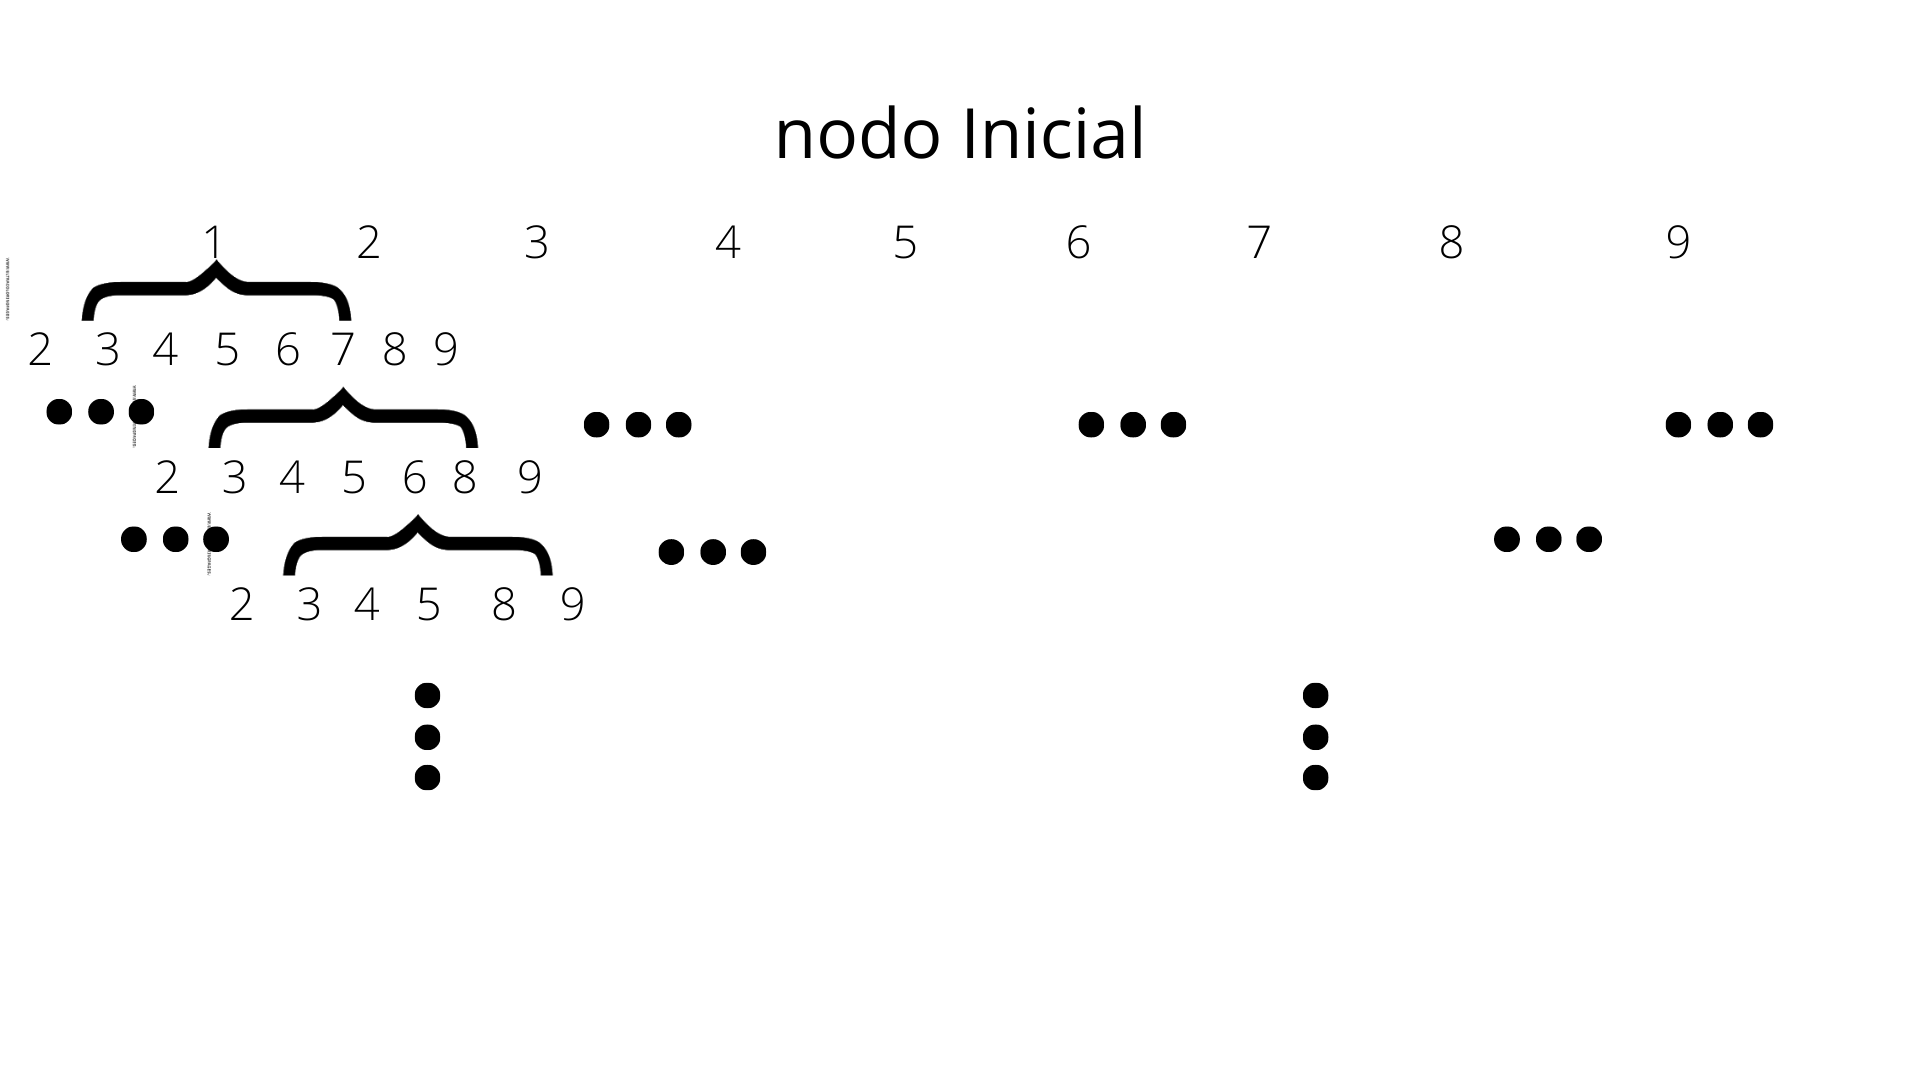

## Recorrido en profundidad

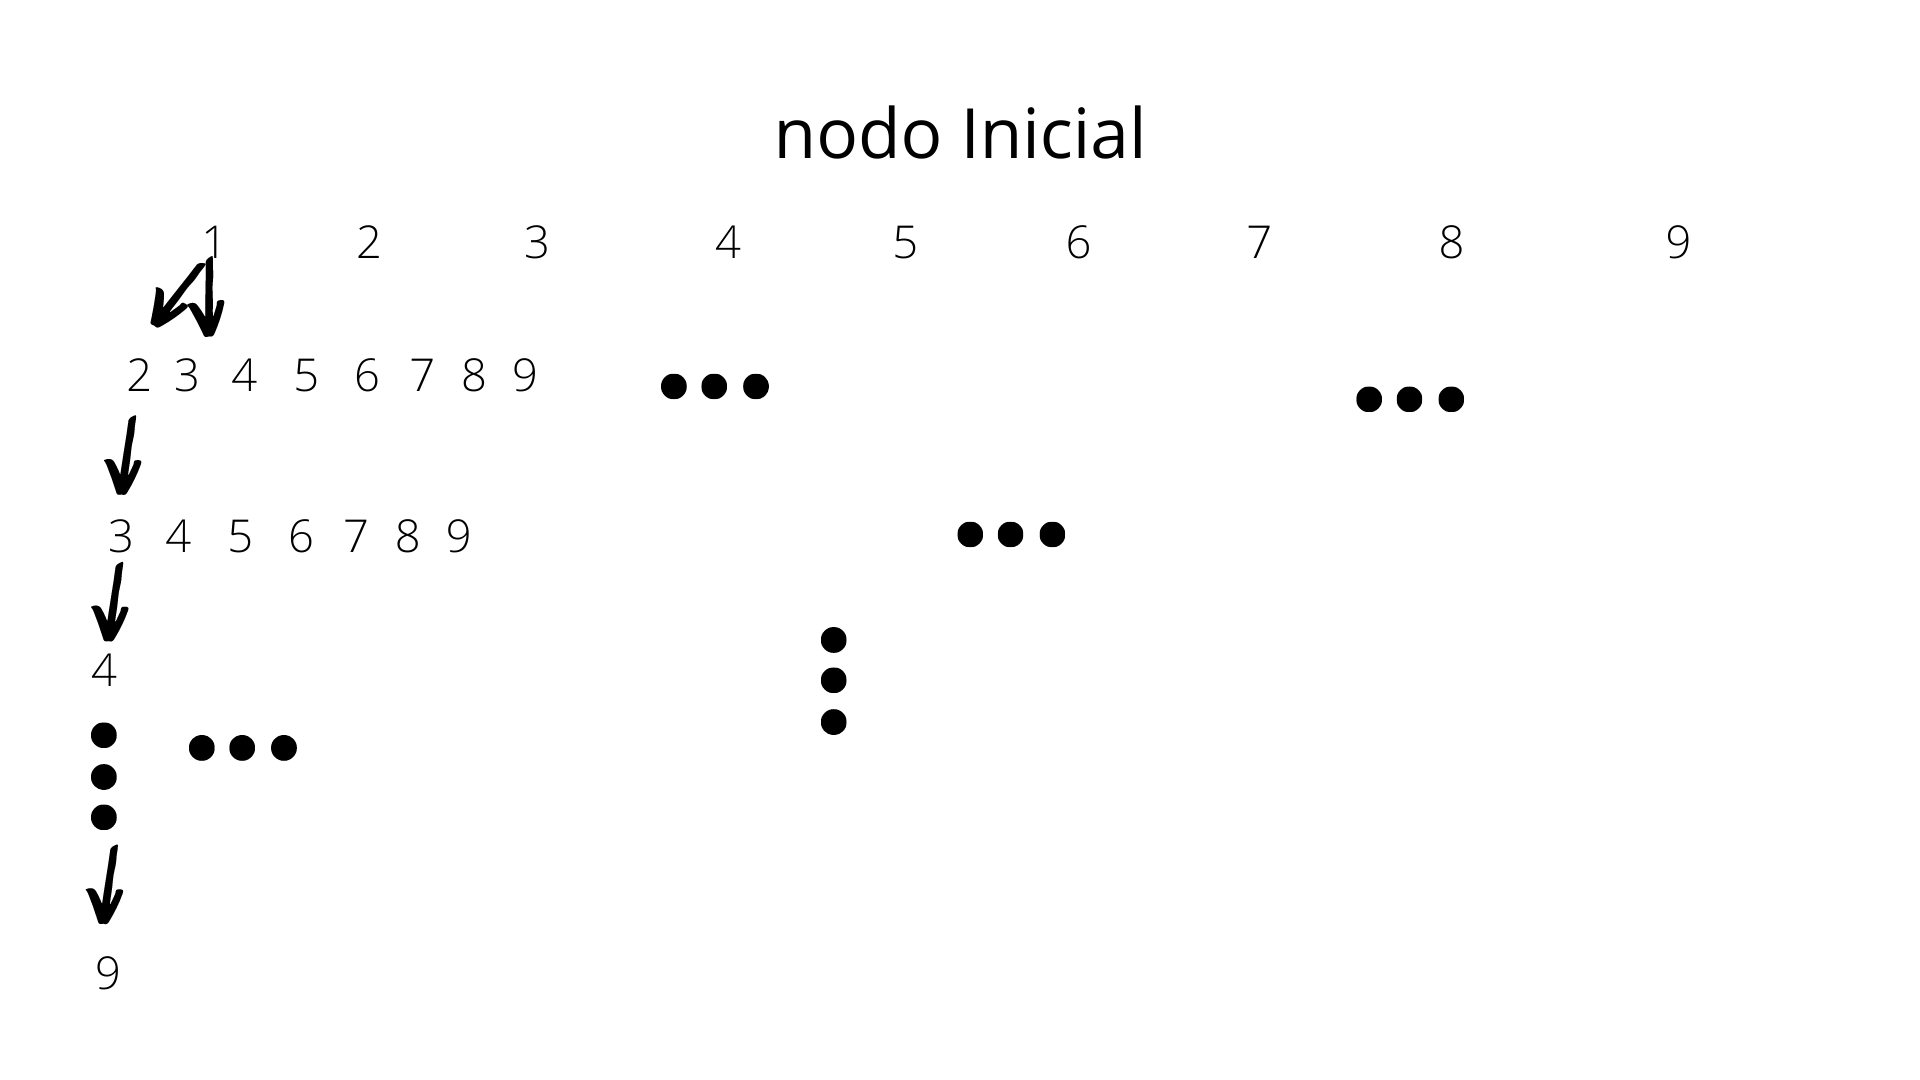

### Comparando Tree search con Graph search:
   En este problema, al estar considerando que no se permiten repetidos, no es necesario realizar la verificación del control de repetidos al resolver. Por ello, el graph search en este problema tarda más. En el caso de la búsqueda en profundidad, no se aprecia tanto la diferencia pero en anchura sí. El problema no lo pudimos ejecutar completo debido al tiempo que tardaba.
   Lo mismo ocurre con el resto de los algoritmos que usan graph search como es "uniform_cost_search".


In [37]:
depth_first_graph_search(p).solution()

[9, 7, 2, 8, 4, 3, 6, 1, 5]

In [38]:
%%timeit
depth_first_graph_search(puzleInfantil()).solution()

335 ms ± 17.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [39]:
resuelve_puzleInfantil(p.initial, depth_first_graph_search )

Solución: [9, 7, 2, 8, 4, 3, 6, 1, 5]
Algoritmo: depth_first_graph_search
Longitud de la solución: 9. Nodos analizados: 13084. 


In [40]:
breadth_first_graph_search(p).solution()

KeyboardInterrupt: 

In [41]:
uniform_cost_search(p).solution()

KeyboardInterrupt: 

### Búsqueda de profundidad limitada:
- Es completa en este caso ya que L=p=9 siendo p la profundidad máxima
- Es mejor que las búsquedas en profundidad ya que no realiza el control de repeticiones que ya era innecesario en este problema.
- A pesar de que en sí no es óptima, en este problema eso no importa ya que ninguna solución es mejor que otra

In [43]:
depth_limited_search(p,9).solution()

[1, 2, 4, 7, 5, 8, 3, 6, 9]

In [44]:
resuelve_puzleInfantil(p.initial, depth_limited_search )

Solución: [1, 2, 4, 7, 5, 8, 3, 6, 9]
Algoritmo: depth_limited_search
Longitud de la solución: 9. Nodos analizados: 1926. 


### Búsqueda de profundidad iterativa:
- Al ser peor su tiempo al que la búsqueda en anchura, para este problema, este algoritmo no sirve. Sigue expandiendo muchos nodos e incuso expande 400 nodos más que la búsqueda primero en anchura.

In [45]:
iterative_deepening_search(p).solution()

[1, 2, 4, 7, 5, 8, 3, 6, 9]

In [46]:
resuelve_puzleInfantil(p.initial, iterative_deepening_search )

Solución: [1, 2, 4, 7, 5, 8, 3, 6, 9]
Algoritmo: iterative_deepening_search
Longitud de la solución: 9. Nodos analizados: 988335. 
